In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
import matplotlib.pyplot as plt

data = pd.read_csv('turnover.csv', encoding='cp1251')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.3+ KB


In [3]:
data.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [4]:
nans = data.isna().sum()
nans[nans != 0]

,0


In [5]:
data['industry'].unique()

array(['Banks', 'PowerGeneration', 'Retail', 'manufacture', 'Consult',
       'State', 'etc', 'Building', 'IT', ' HoReCa', 'Telecom', 'Pharma',
       'Mining', 'transport', 'Agriculture', 'RealEstate'], dtype=object)

In [6]:
data['traffic'].unique()

array(['rabrecNErab', 'empjs', 'youjs', 'referal', 'advert', 'KA',
       'recNErab', 'friends'], dtype=object)

In [7]:
categorical_columns = ['gender', 'industry', 'profession', 'traffic', 'coach', 'head_gender', 'greywage', 'way']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(data[categorical_columns])

encoded_columns = encoder.get_feature_names_out(categorical_columns)

encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

numeric_data = data.drop(columns=categorical_columns)
final_data = pd.concat([numeric_data, encoded_df], axis=1)

In [8]:
final_data.head()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator,gender_m,industry_Agriculture,...,traffic_rabrecNErab,traffic_recNErab,traffic_referal,traffic_youjs,coach_no,coach_yes,head_gender_m,greywage_white,way_car,way_foot
0,7.030801,1,35.0,6.2,4.1,5.7,7.1,8.3,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,22.965092,1,33.0,6.2,4.1,5.7,7.1,8.3,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,15.934292,1,35.0,6.2,6.2,2.6,4.8,8.3,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,15.934292,1,35.0,5.4,7.6,4.9,2.5,6.7,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8.410678,1,32.0,3.0,4.1,8.0,7.1,3.7,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [9]:
scaler = MinMaxScaler()
data_standardized = final_data.copy()
data_standardized[:] = scaler.fit_transform(final_data)

In [10]:
data_standardized.head()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator,gender_m,industry_Agriculture,...,traffic_rabrecNErab,traffic_recNErab,traffic_referal,traffic_youjs,coach_no,coach_yes,head_gender_m,greywage_white,way_car,way_foot
0,0.037064,1,0.425,0.577778,0.344444,0.522222,0.650602,0.811111,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.126055,1,0.375,0.577778,0.344444,0.522222,0.650602,0.811111,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.086789,1,0.425,0.577778,0.577778,0.177778,0.373494,0.811111,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.086789,1,0.425,0.488889,0.733333,0.433333,0.096386,0.633333,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.044771,1,0.350,0.222222,0.344444,0.777778,0.650602,0.300000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [11]:
data_standardized.shape

(1129, 51)

In [17]:
data_standardized['event'].value_counts()


,count
event,
1,571
0,558


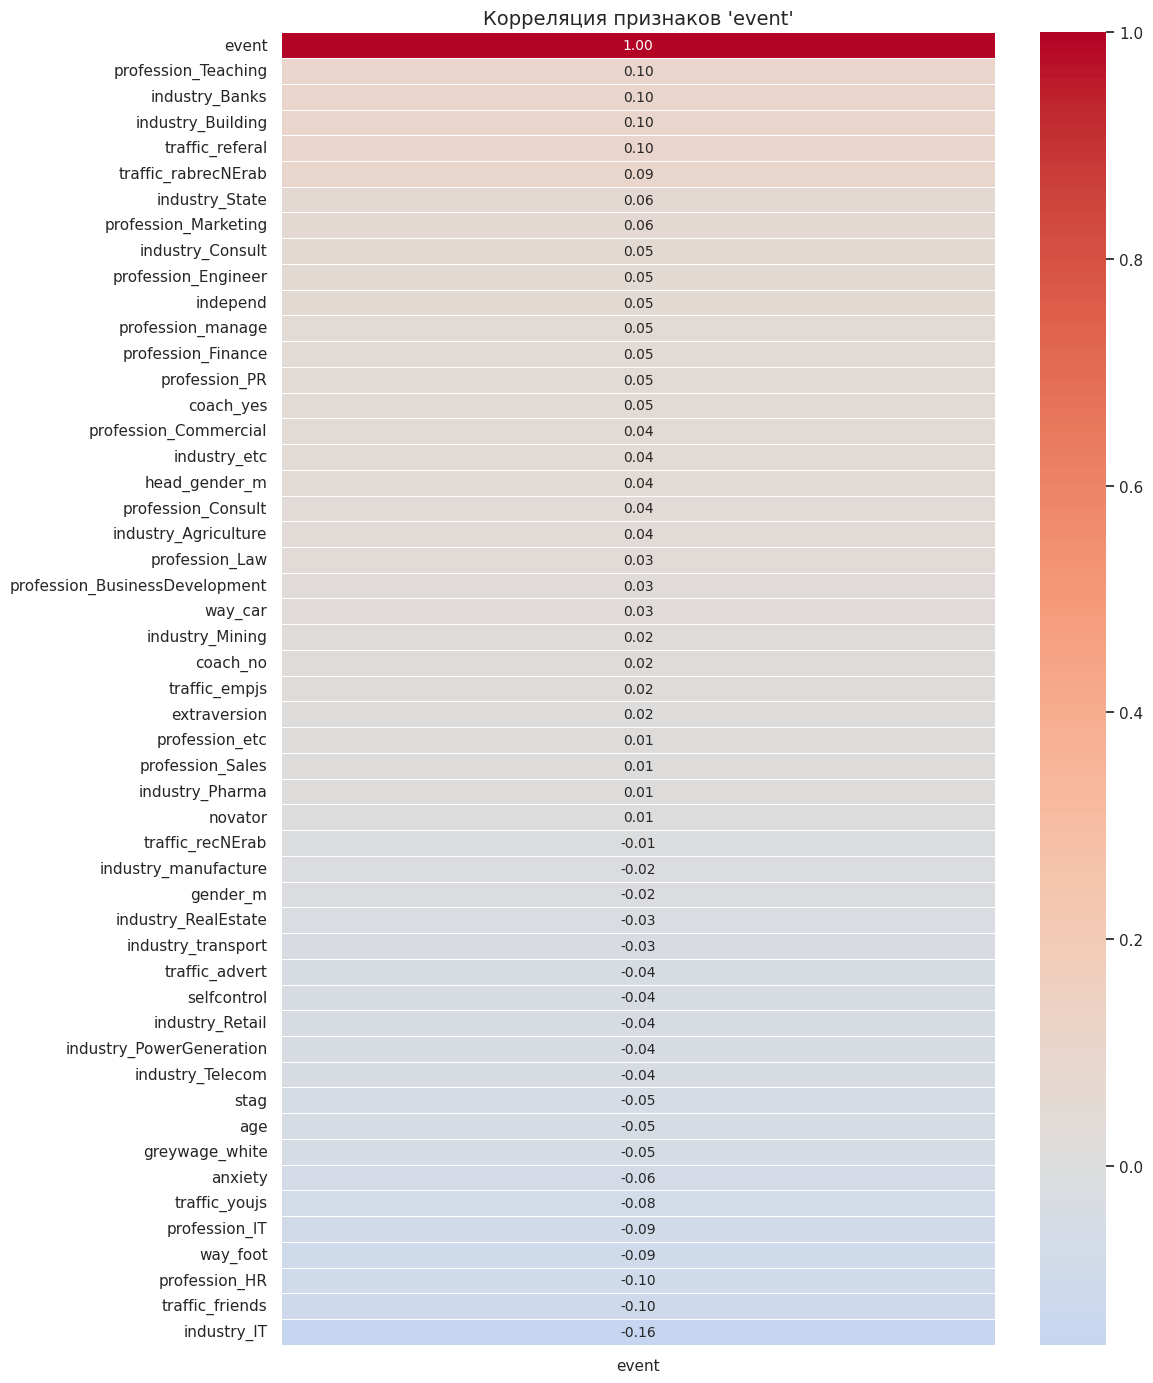

In [12]:
correlation_matrix = data_standardized.corr(numeric_only=True)


plt.figure(figsize=(12, 14))
sns.set(font_scale=1.0)


sns.heatmap(
    correlation_matrix[['event']].sort_values(by='event', ascending=False),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    cbar=True,
    linewidths=0.5,
    annot_kws={"size": 10}
)

plt.title("Корреляция признаков 'event'", fontsize=14)
plt.tight_layout()
plt.show()

In [15]:
X = data_standardized.drop(columns=['event'])
y = data_standardized['event']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))

Accuracy: 0.668141592920354
Confusion Matrix:
 [[78 30]
 [45 73]]
Precision: 0.7087378640776699
Recall: 0.6186440677966102
f1_score: 0.6606334841628959
